In [13]:
%reload_ext autoreload
%autoreload 2

%reload_ext autoreload
%autoreload 2
import sys; sys.path.append('..')
from src.data_utils import get_dataset_imagenet, imagenet_r_classes
from jupyter_preproc import smoothen, probs_to_softacc
import numpy as np
import time
import matplotlib.pyplot as plt
rng = np.random.default_rng(5)
import seaborn as sns
import matplotlib as mpl
from plot_utils import stacksimple

In [14]:
r_npz_path = '/home/jupyter/processed/imagenet/resnet50/resnet50_imagenet_r.npz'
r_scores_path = '/home/jupyter/dist-shift/scores/imagenet/resnet50/resnet50_imagenet_r_scores.npz'

In [15]:
data_r = np.load(r_npz_path, mmap_mode='r')
scores_r = np.load(r_scores_path, mmap_mode='r')

In [17]:
gname = 'imagenet_r'
dataset = get_dataset_imagenet(gname)
ytest = dataset.targets
classes = imagenet_r_classes


In [18]:
print([key for key in data_r.keys()])

['x', 'all_acc', 'x_err', 'all_acc_err', 'points', 'points_err', 'labels', 'labels_err', 'probs', 'freqs']


In [19]:
print([key for key in scores_r.keys()])

['ent_nonmono', 'ent_thresh', 'ent_easy', 'acc_nonmono', 'acc_thresh', 'acc_easy']


In [20]:
scores_r['ent_nonmono'].argsort()

array([17171, 28599, 26933, ..., 18944,  1436,  1423])

In [21]:
## parameters
t = 'probs'
smooth = True
num_gridpts = 50 # num pts on x-axis
sigma = 2.0

## generate plot
xkey = 'x'

## random plot
# i = rng.choice(range(10000)) # random image index
i = 7505
sns.reset_defaults()
mpl.rcParams['font.family'] = 'sans-serif'

res = smoothen(data_r, xkey, t, i)

xx = res[f'{xkey}_grid']
yy = res[f'{t}_smooth']
    
f = stacksimple(i, xx, yy, dataset, classes) # the actual plot
f.axes[0].set_title(f'{gname}: {t}. Sample {i}');

In [22]:
## parameters
t = 'probs'
smooth = True
num_gridpts = 50 # num pts on x-axis
sigma = 2.0

## generate plot
xkey = 'x'

## random plot
# i = rng.choice(range(10000)) # random image index

sns.reset_defaults()
mpl.rcParams['font.family'] = 'sans-serif'



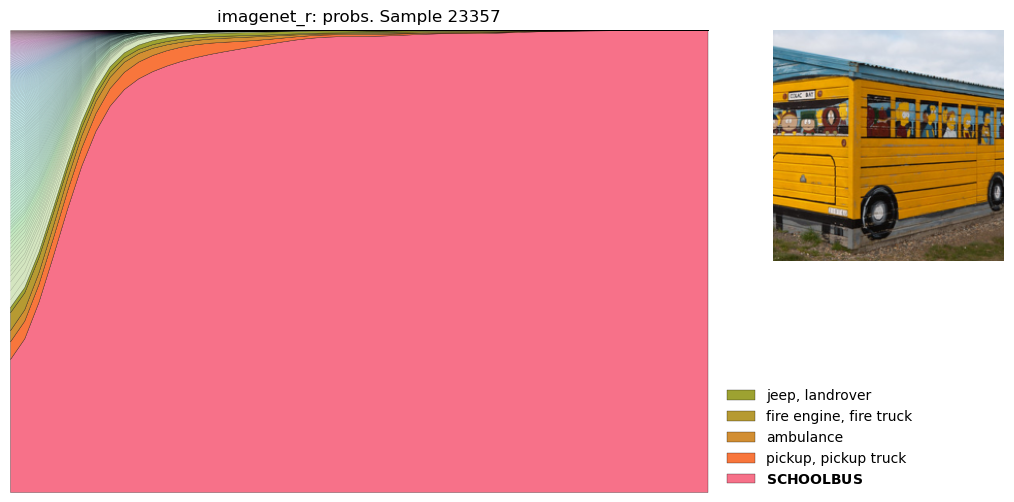

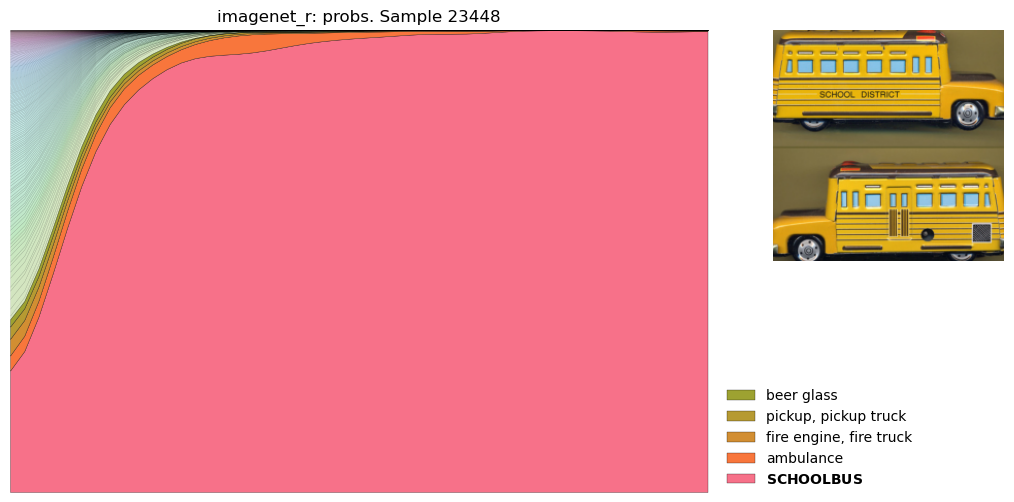

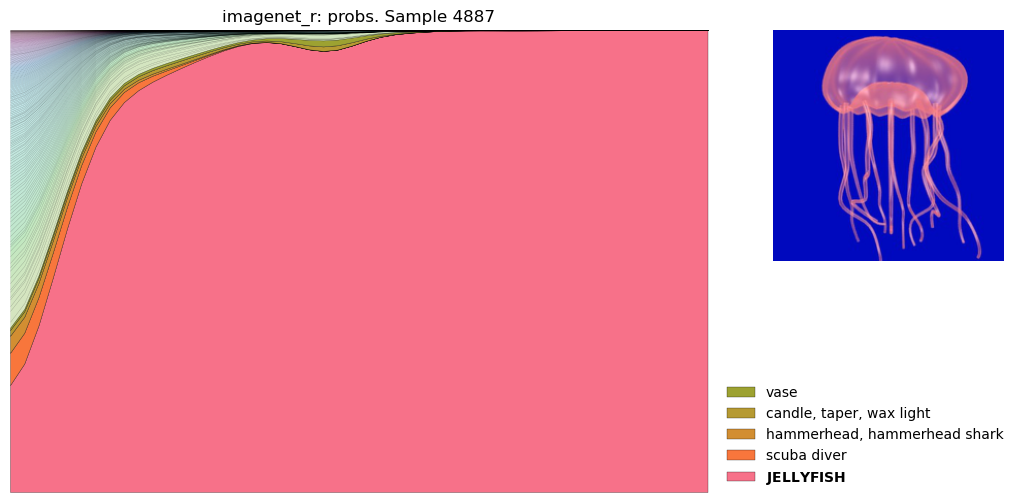

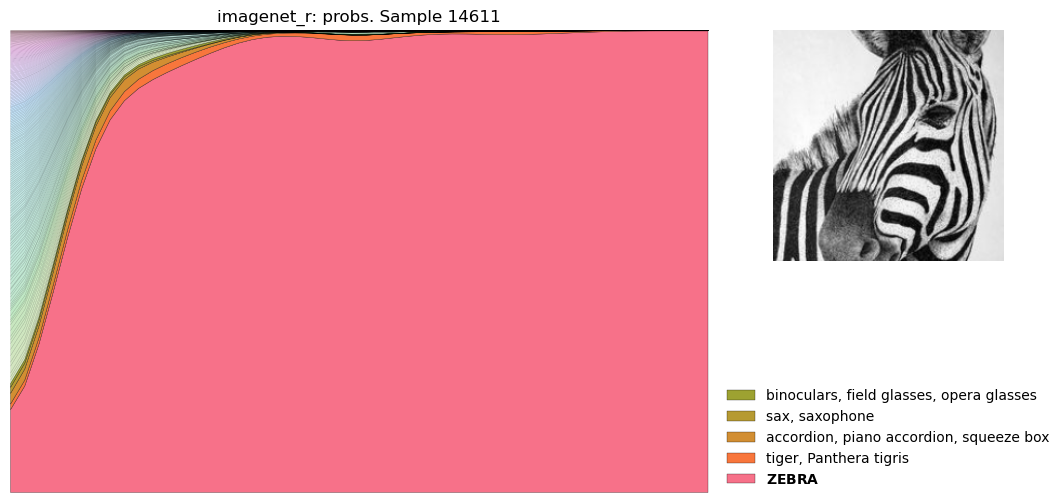

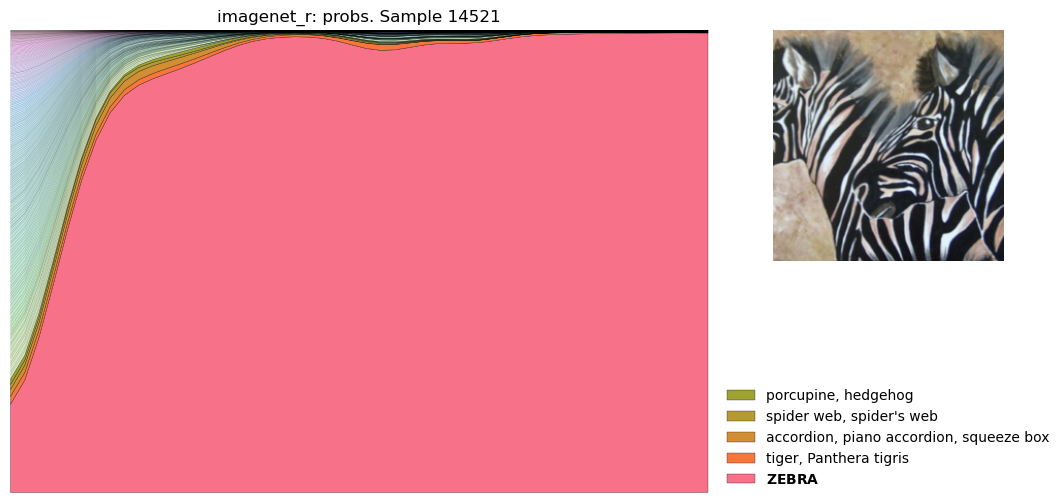

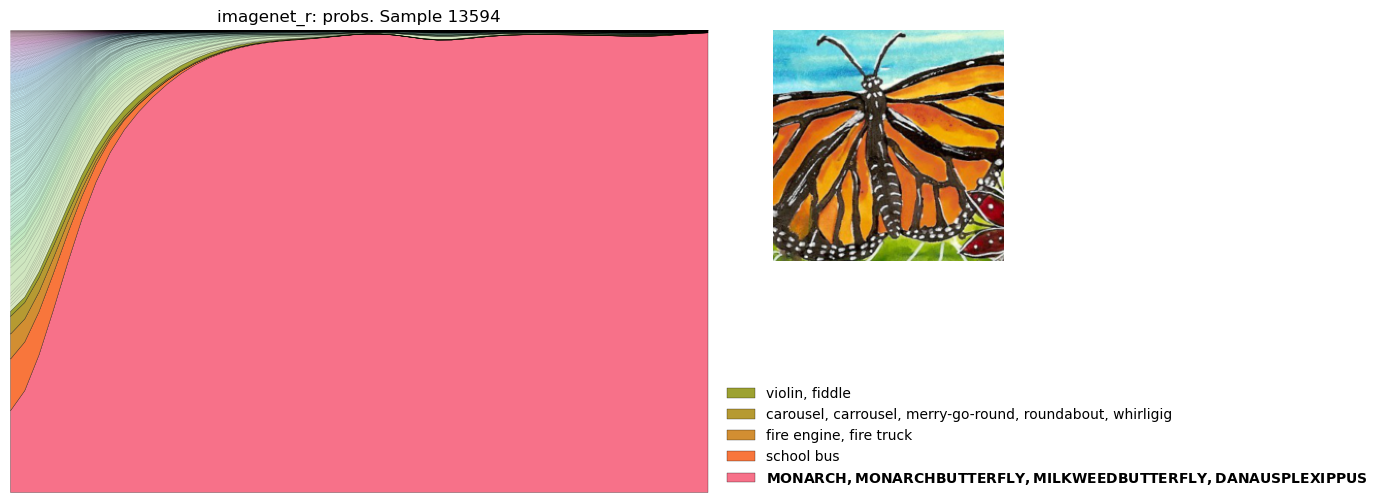

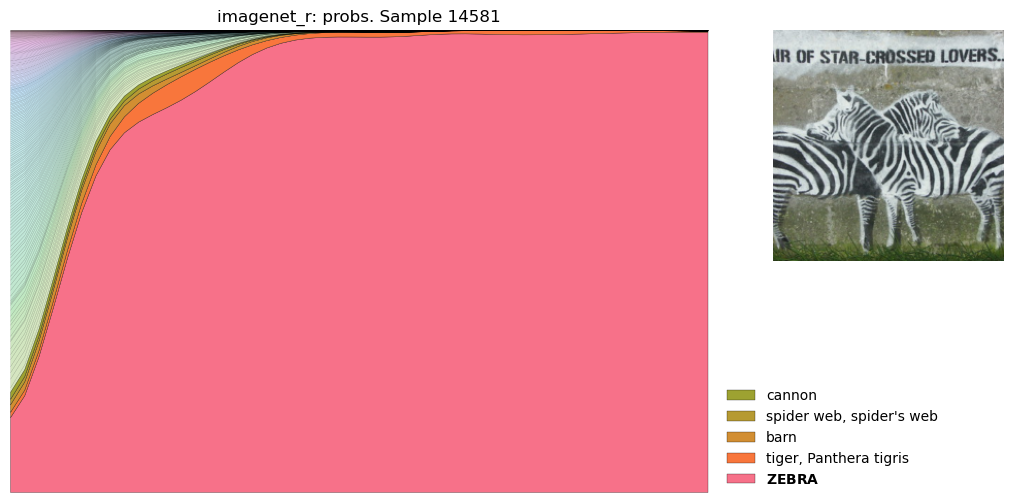

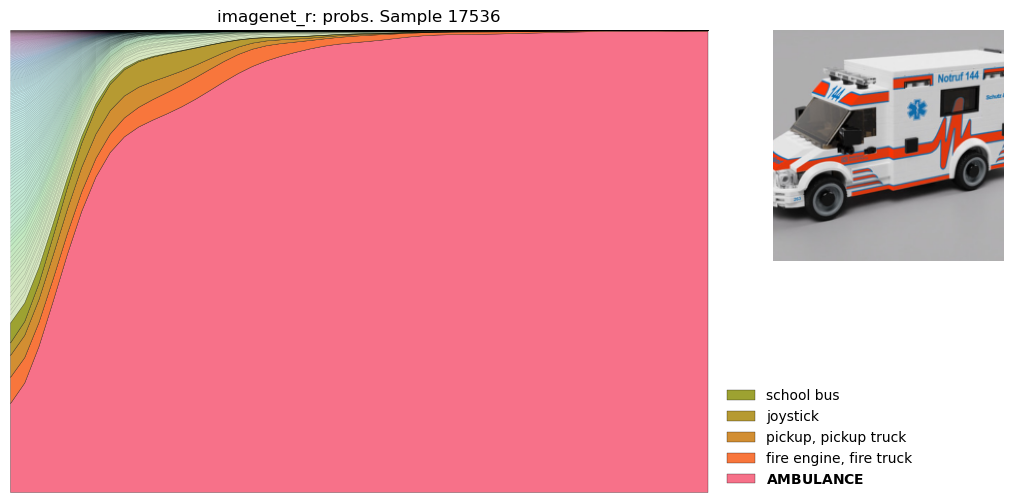

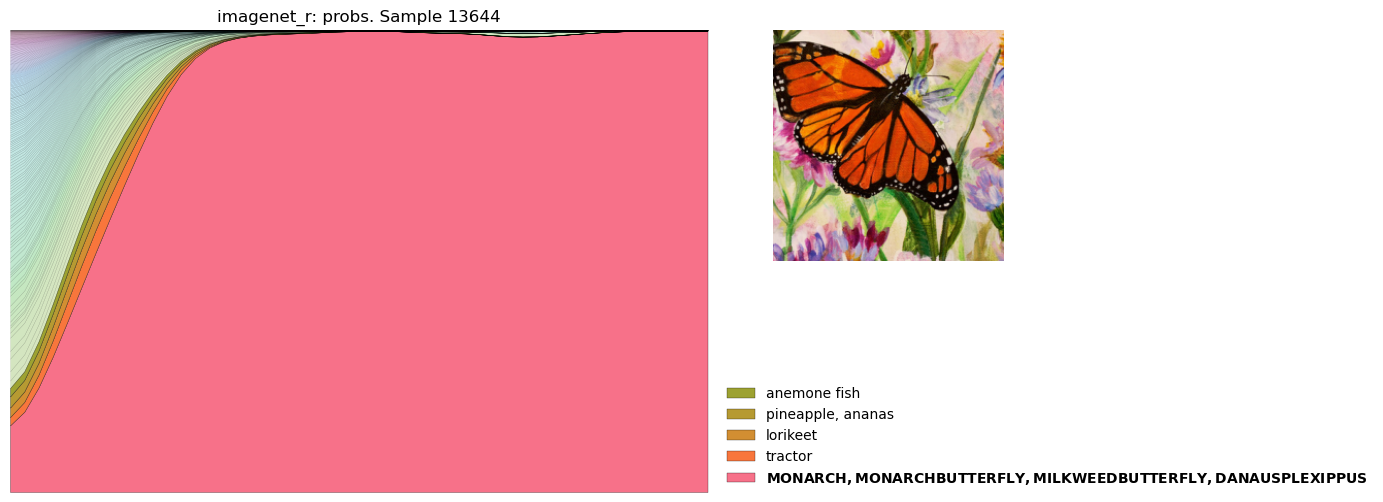

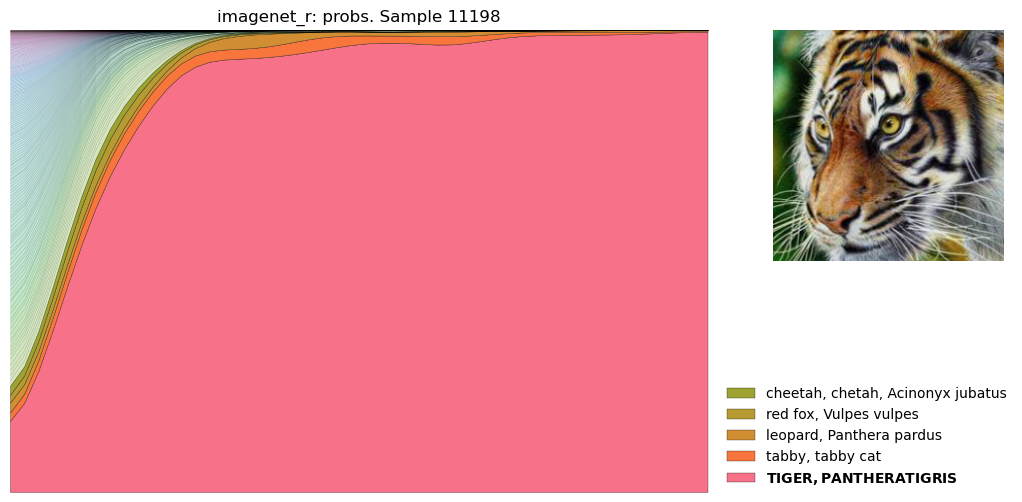

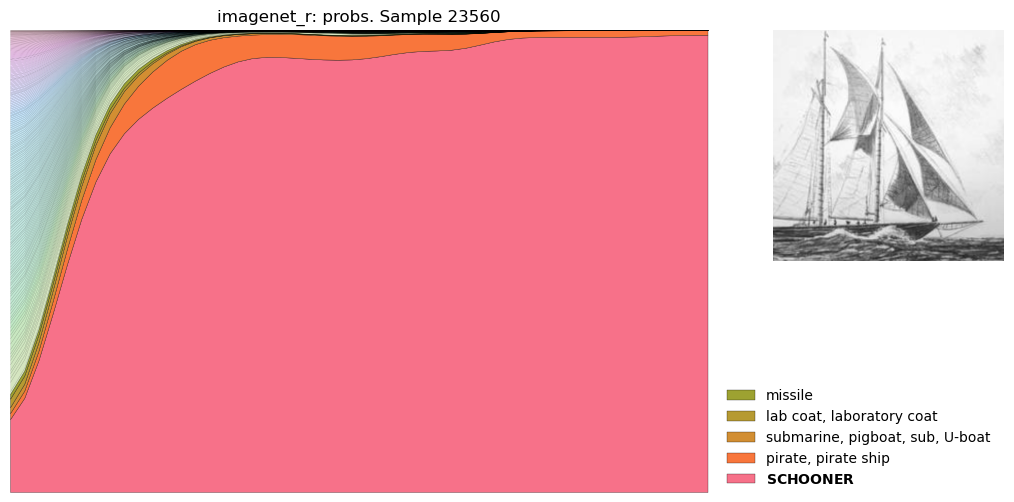

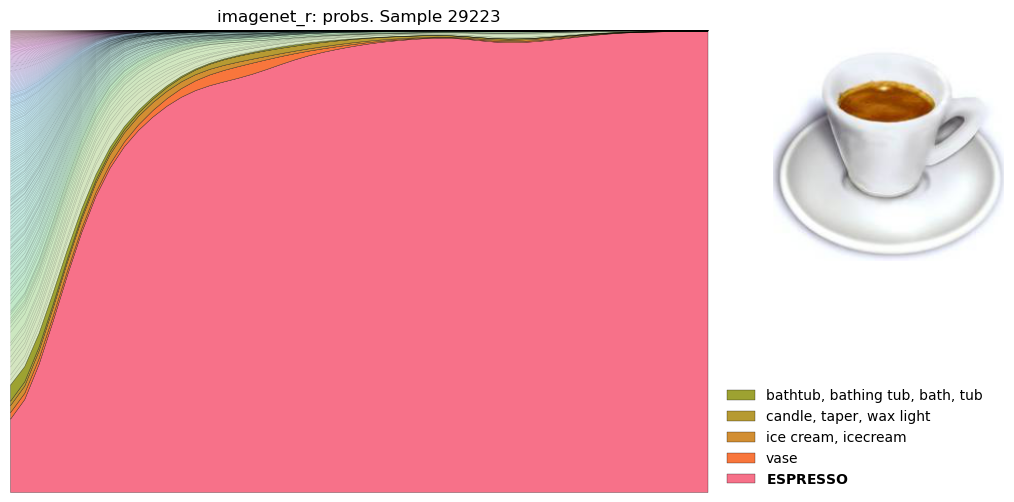

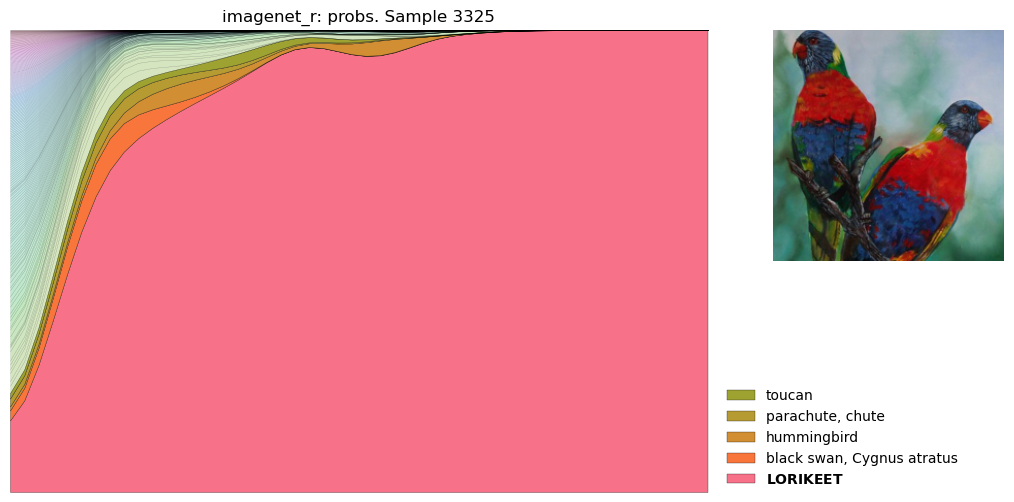

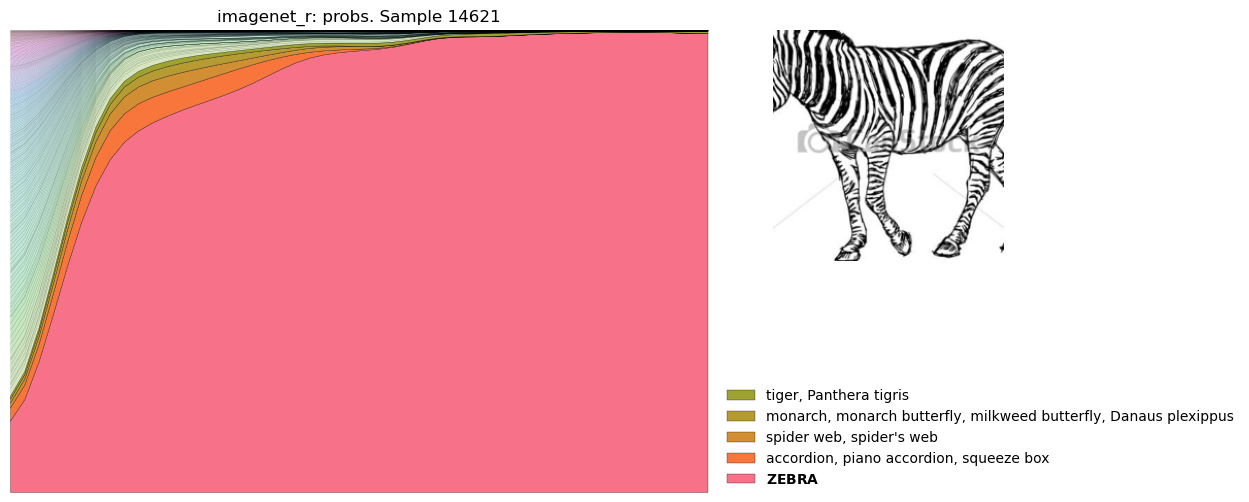

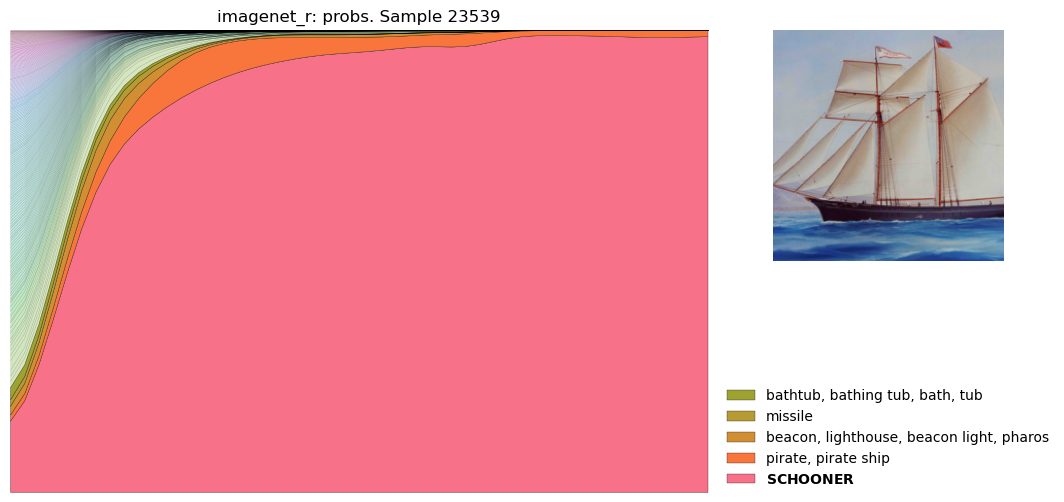

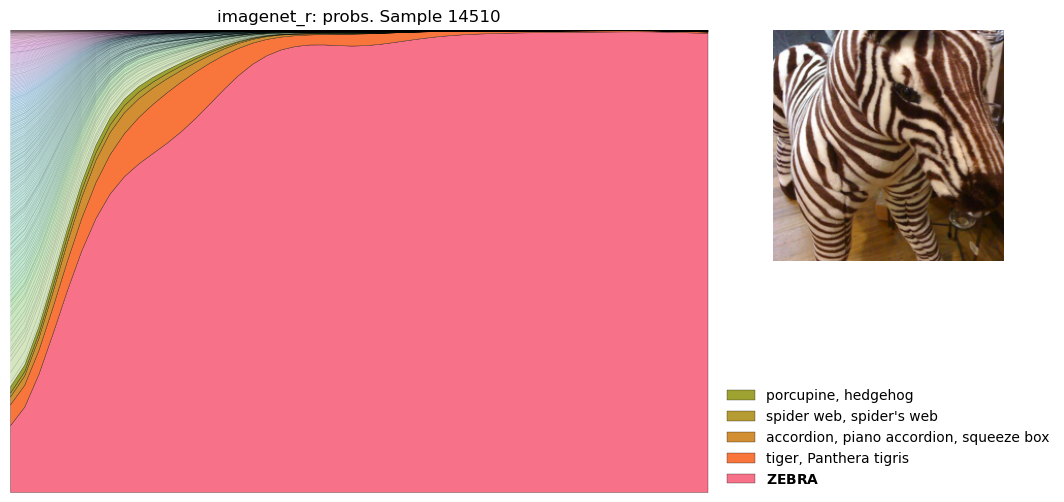

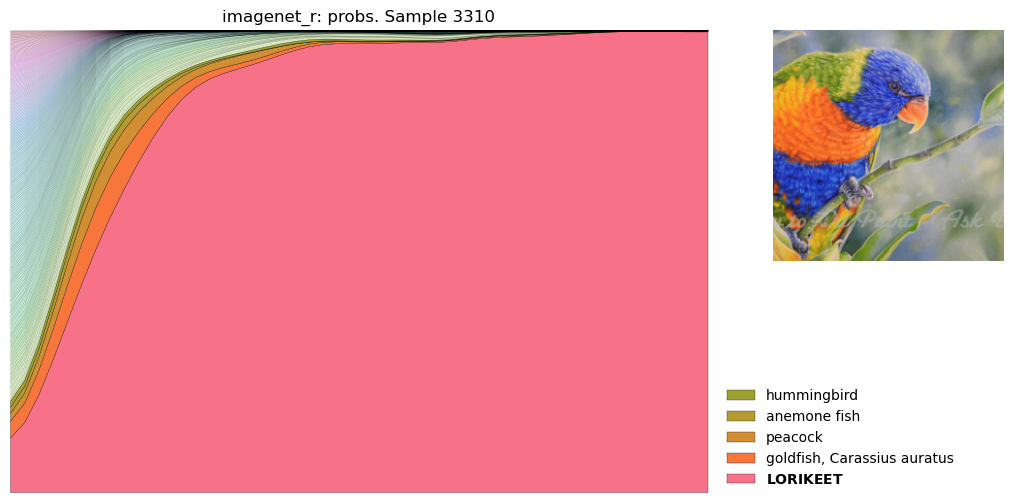

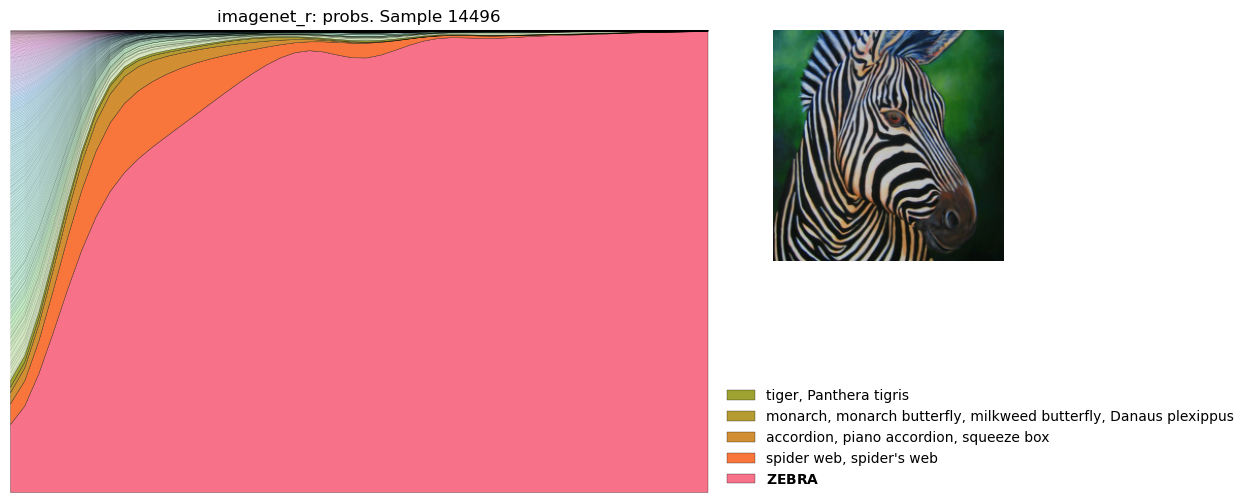

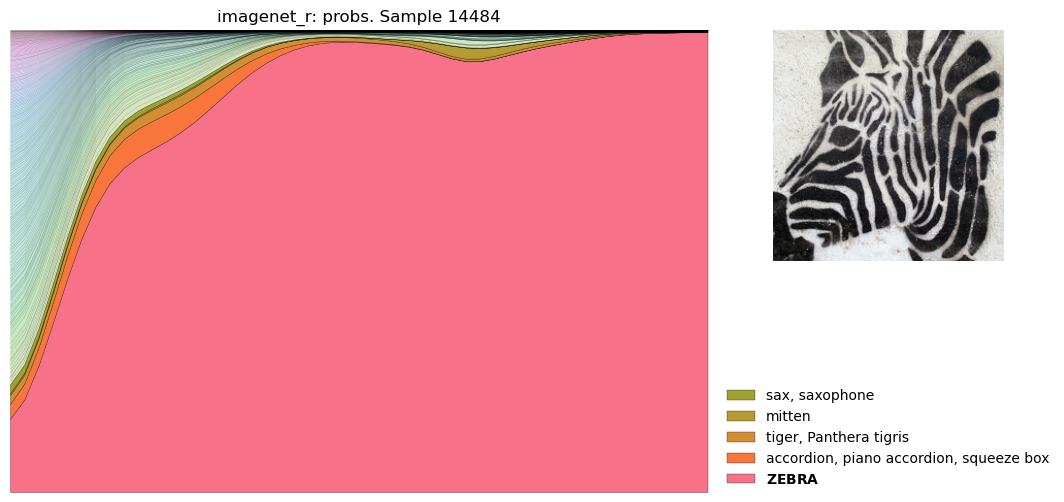

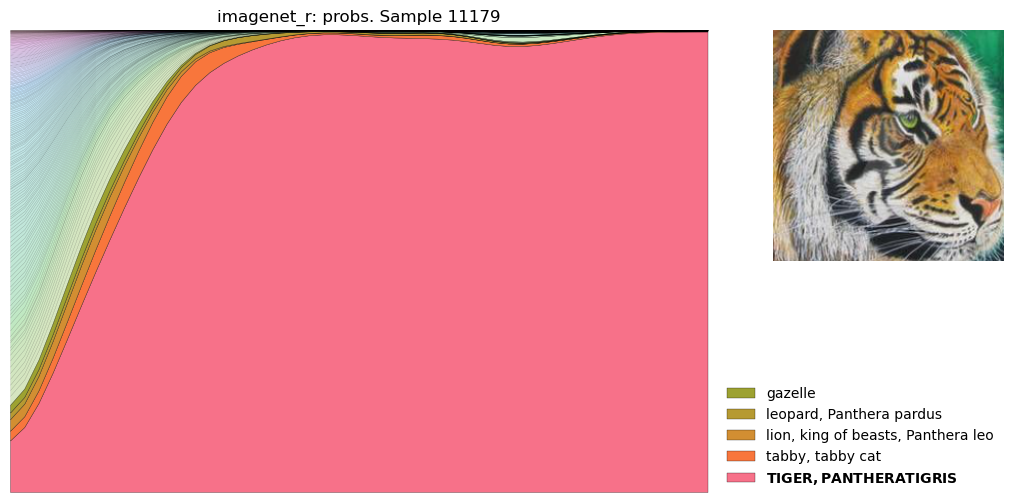

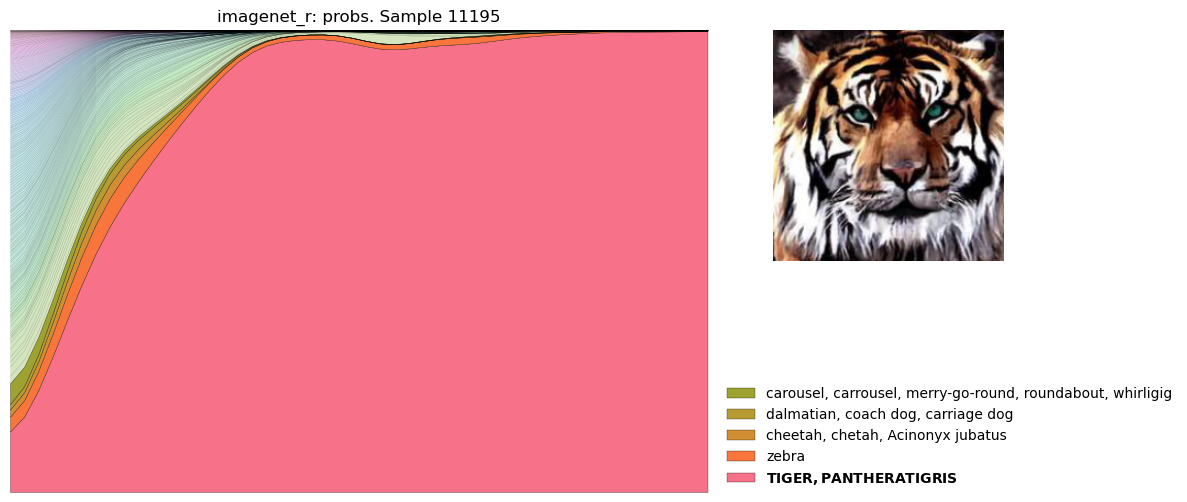

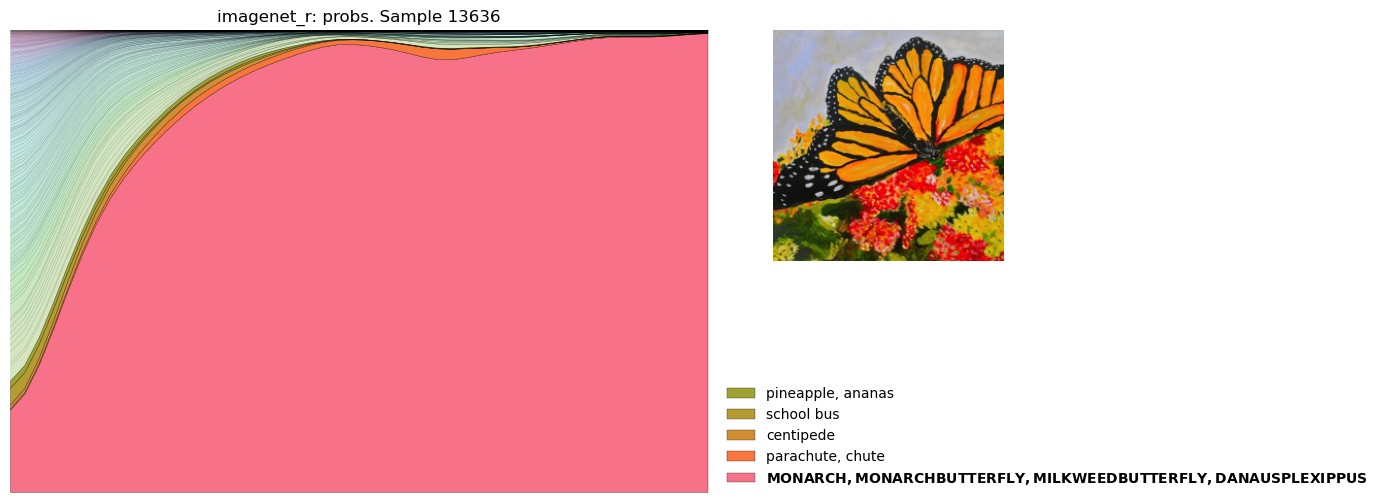

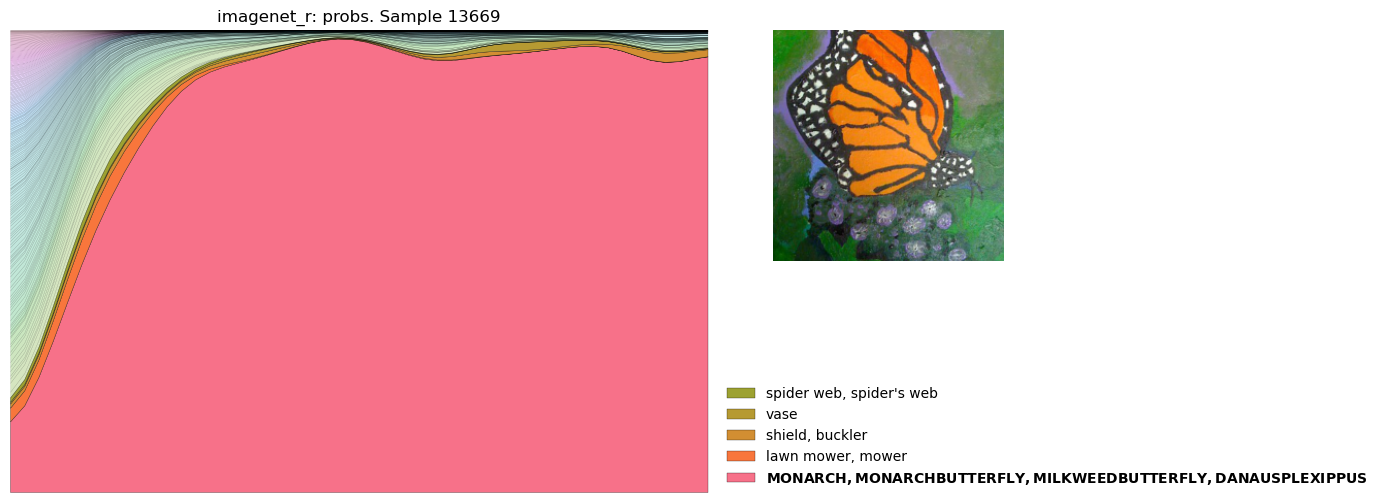

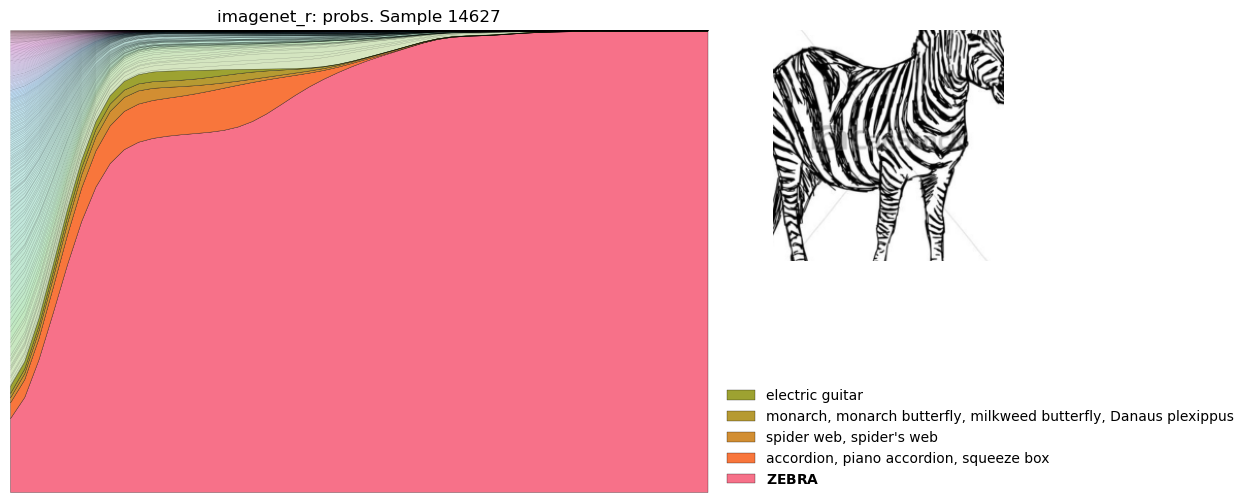

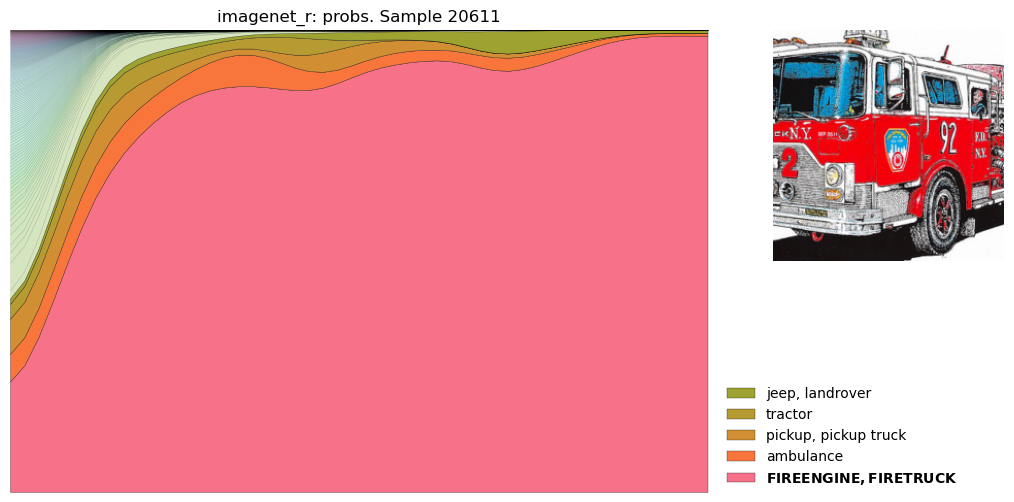

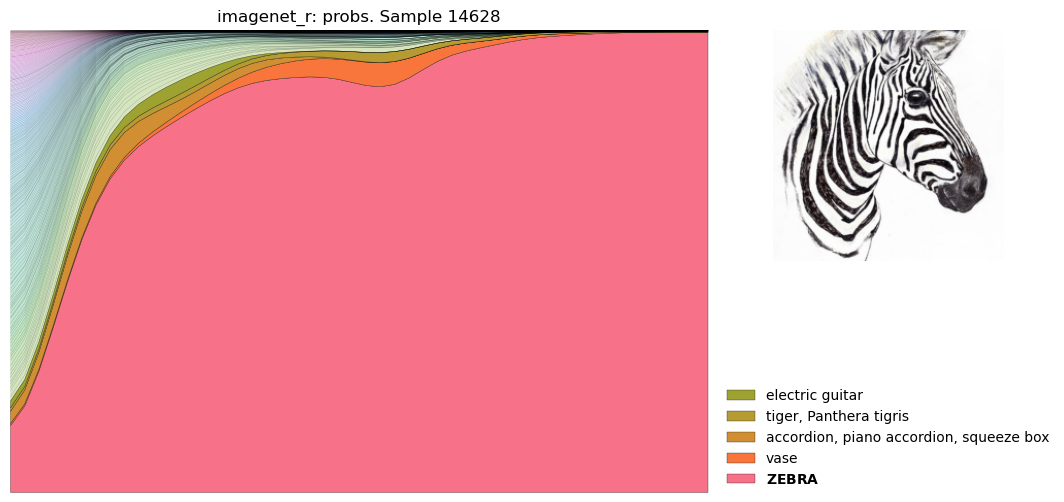

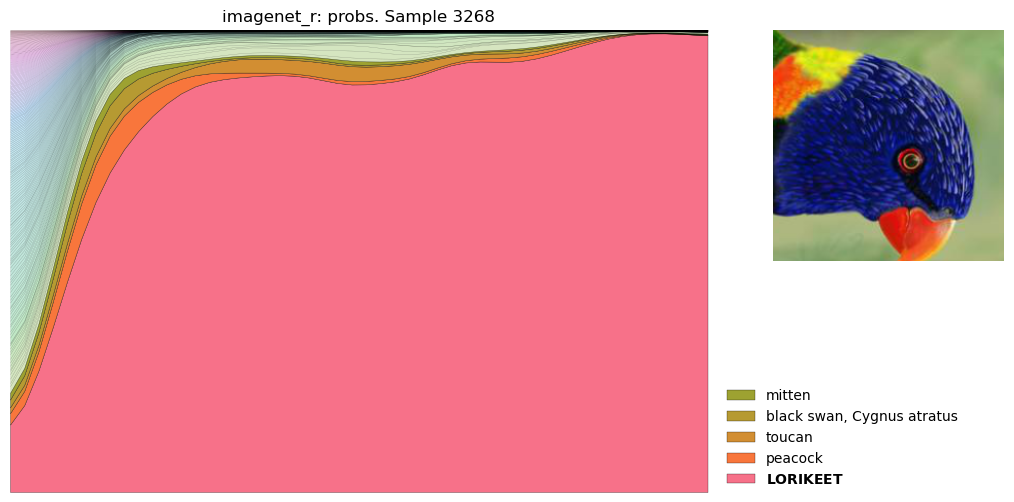

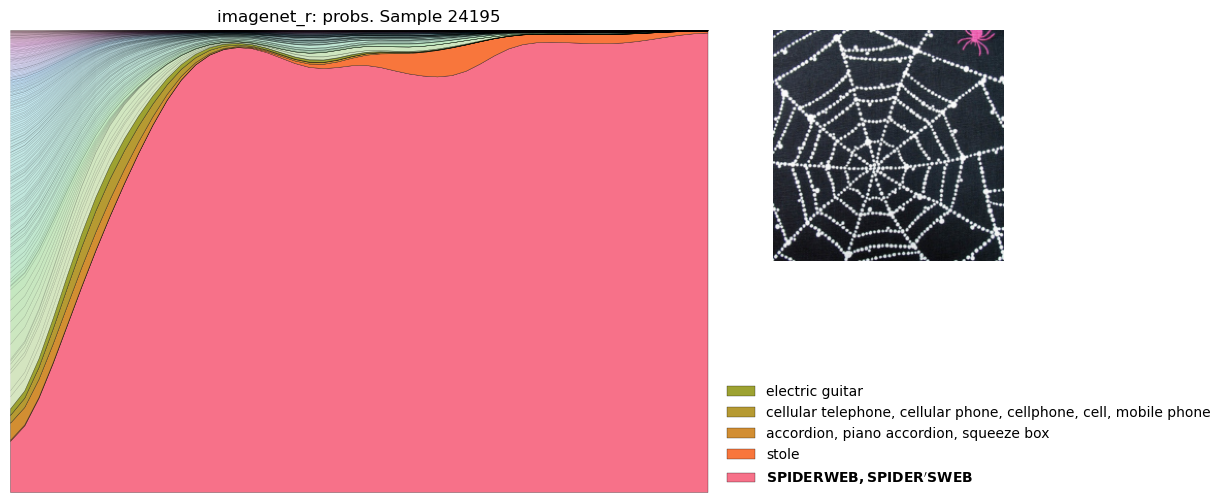

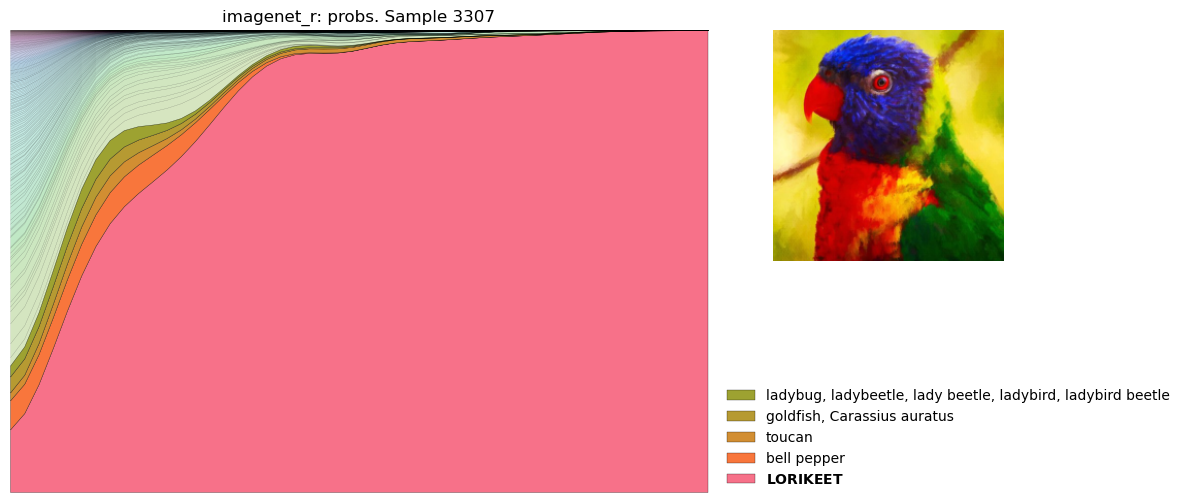

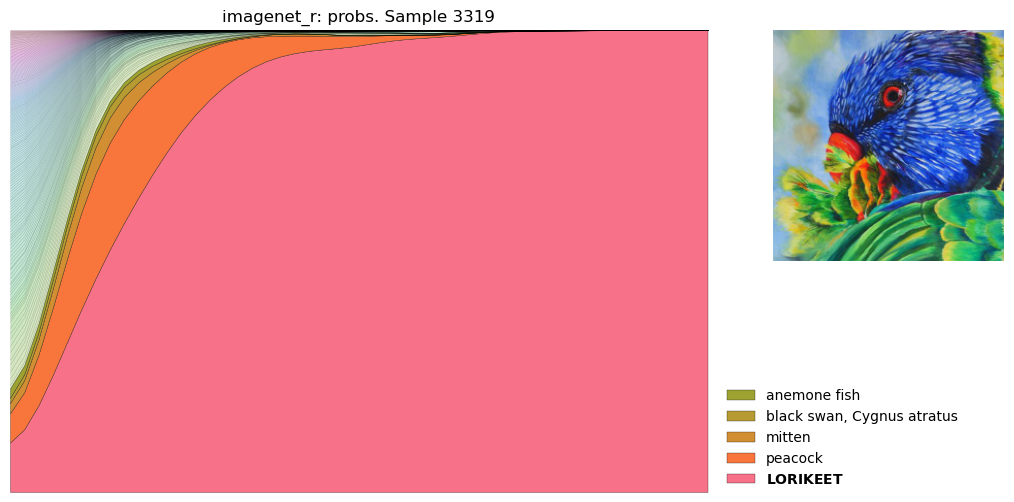

In [25]:
for i in (-scores_r['acc_easy']).argsort()[0:30]:
    res = smoothen(data_r, xkey, t, i)

    xx = res[f'{xkey}_grid']
    yy = res[f'{t}_smooth']
    
    f = stacksimple(i, xx, yy, dataset, classes) # the actual plot
    f.axes[0].set_title(f'{gname}: {t}. Sample {i}')
    plt.show()
    

In [ ]:
for i in scores_r['ent_nonmono'].argsort()[30:60]:
    res = smoothen(data_r, xkey, t, i)

    xx = res[f'{xkey}_grid']
    yy = res[f'{t}_smooth']
    
    f = stacksimple(i, xx, yy, dataset, classes) # the actual plot
    f.axes[0].set_title(f'{gname}: {t}. Sample {i}')
    plt.show()

In [ ]:
for i in scores_r['ent_nonmono'].argsort()[60:90]:
    res = smoothen(data_r, xkey, t, i)

    xx = res[f'{xkey}_grid']
    yy = res[f'{t}_smooth']
    
    f = stacksimple(i, xx, yy, dataset, classes) # the actual plot
    f.axes[0].set_title(f'{gname}: {t}. Sample {i}')
    plt.show()